<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Access_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access and plot AROME Arctic weather forecasts

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr 

Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [2]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_full_2_5km_latest.nc'
dataset = xr.open_dataset(url)

Metadata

In [ ]:
dataset

Find a specific point and plot the forecast.
Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,78.24,15.46) # For example for Longyearbyen

In [7]:
t2m_point = dataset.air_temperature_2m[:,0,ix,jx]

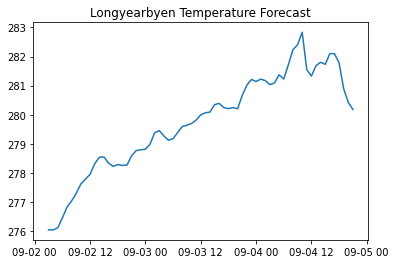

In [8]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

Plot one forecast on a map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


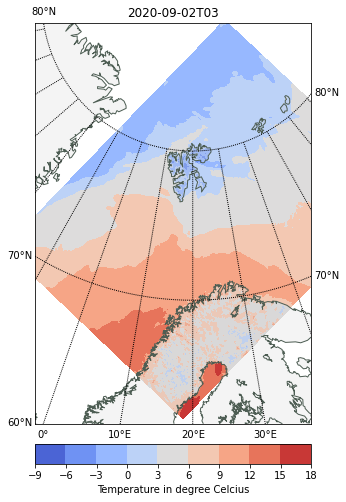

In [9]:
from mpl_toolkits.basemap import Basemap

timestep=0


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.longitude),np.array(dataset.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.air_temperature_2m[timestep,0,:,:])-273.15,cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')

Explore metedata of other files

In [10]:
url_pp='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_pp_2_5km_latest.nc'
dataset_pp = xr.open_dataset(url_pp)
url_sfx='https://thredds.met.no/thredds/dodsC/aromearcticlatest/arome_arctic_sfx_2_5km_latest.nc'
dataset_sfx = xr.open_dataset(url_sfx)

In [ ]:
dataset_pp

pp has less variables and coordinated than full. What does "pp" mean?

In [ ]:
dataset

In [ ]:
dataset_sfx

Variables of dataset_sfx seems to be off_shore forecast related? Many strange variables.

Plotting point forecast from pp and sfx

No handles with labels found to put in legend.


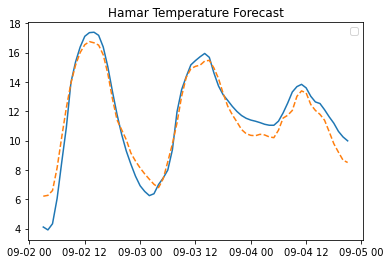

In [25]:
[ix,jx] = findindex(dataset_pp.latitude,dataset_pp.longitude,60.47,11.40) # Hamar
temp = dataset_pp.air_temperature_2m[:,0,ix,jx]
temp1 = dataset.air_temperature_2m[:,0,ix,jx]

from matplotlib import pyplot as plt

plt.plot(dataset_pp.time, temp-273, '-')
plt.plot(dataset.time, temp1-273, '--')
plt.legend()
plt.title("Hamar Temperature Forecast")
plt.show()


In [ ]:
[ix,jx] = findindex(dataset.latitude,dataset.longitude,60.47,11.40) # Hamar
temp = dataset.air_temperature_2m[:,0,ix,jx]
from matplotlib import pyplot as plt

plt.plot(dataset.time, temp-273, '-')

plt.title("Hamar Temperature Forecast FULL")
plt.show()